In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# 1. Data Load

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.000,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.000,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.000,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.000,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.000,1


- id : 샘플 아이디
- Gender : 성별
- Customer Type : Disloyal 또는 Loyal 고객
- Age : 나이
- Type of Travel : Business 또는 Personal Travel
- Class : 등급
- Flight Distance : 비행 거리
- Seat comfort : 좌석 만족도
- Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
- Food and drink : 식음료 만족도
- Gate location : 게이트 위치 만족도
- Inflight wifi service : 기내 와이파이 서비스 만족도
- Inflight entertainment : 기내 엔터테인먼트 만족도
- Online support : 온라인 지원 만족도
- Ease of Online booking : 온라인 예매 편리성 만족도
- On-board service : 탑승 서비스 만족도
- Leg room service : Leg room 서비스 만족도
- Baggage handling : 수하물 처리 만족도
- Checkin service : 체크인 서비스 만족도
- Cleanliness : 청결도 만족도
- Online boarding : 온라인보딩 만족도
- Departure Delay in Minutes : 출발 지연 시간
- Arrival Delay in Minutes : 도착 지연 시간
- target : 만족 여부

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

In [5]:
numeric_col = [col for col in train if train[col].dtype != "object" ]
object_col = [col for col in train if train[col].dtype == "object" ]

In [6]:
len(numeric_col)

20

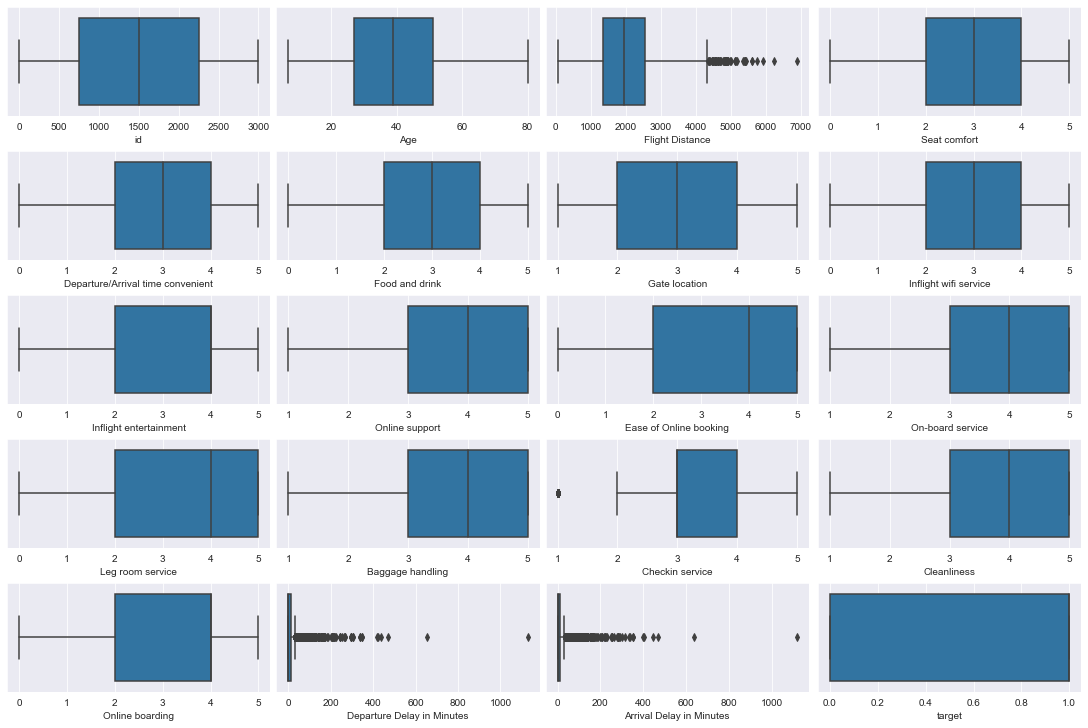

In [7]:
plt.figure( figsize=(15,10),
            constrained_layout = True )

for i in range(len(numeric_col)):
    plt.subplot( 5, 4, i+1 )
    sns.boxplot( train[numeric_col[i]] )

만족도에 관련된 컬럼은 hist로 다시 시각화

In [8]:
rank_col = [
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding'
 ]

In [9]:
len(rank_col)

14

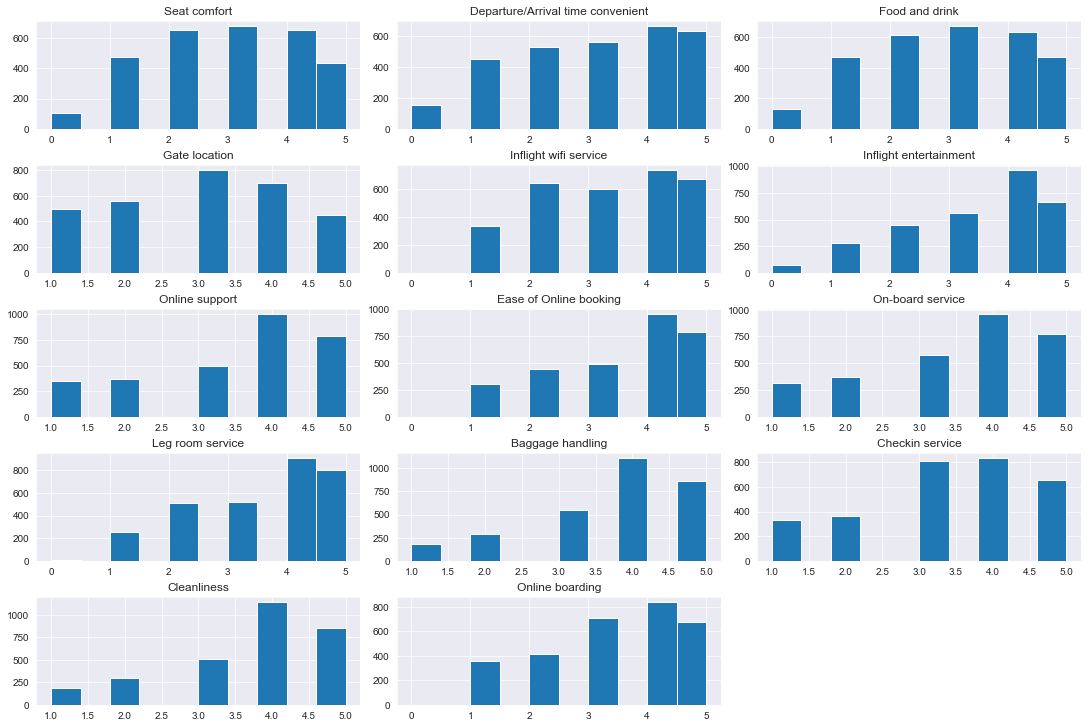

In [10]:
plt.figure( figsize=(15,10),
            constrained_layout = True )

for i in range(len(rank_col)):
    plt.subplot( 5, 3, i+1 )
    plt.hist( train[rank_col[i]] )
    plt.title(rank_col[i])

Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 에는 많은 이상치가 보였기에 이에 대한 확인을 진행

In [11]:
col = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

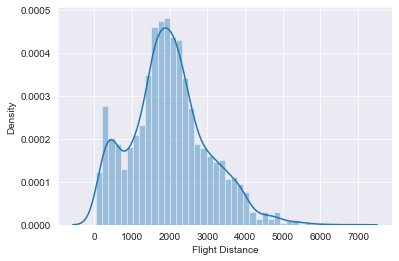

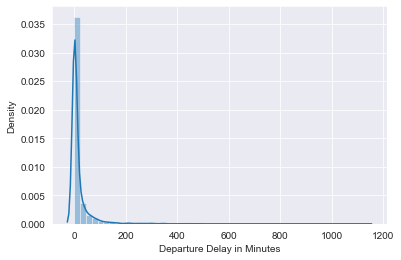

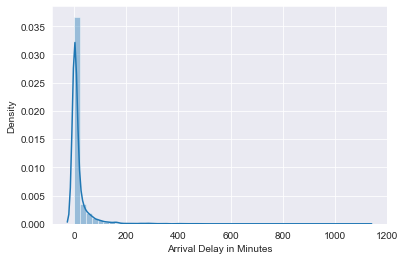

In [12]:
for i in col:
  sns.distplot(train[i])
  plt.show()

In [13]:
bad_time = train[train['Departure/Arrival time convenient'] <= 3]

In [14]:
print(len(bad_time) / 3000)

0.5673333333333334


In [15]:
train_out = train[col]
train_out.describe(percentiles = [.25, .44, .5, .75, .99])

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,3000.000,3000.000,3000.000
mean,1983.079,15.634,15.922
std,1028.109,45.083,45.203
min,52.000,0.000,0.000
25%,1348.250,0.000,0.000
44%,1794.560,0.000,0.000
50%,1937.000,0.000,0.000
75%,2547.250,12.000,13.000
99%,4800.060,206.010,203.040
max,6882.000,1128.000,1115.000


Departure/Arrival time convenient에 대해 만족하지 못한 사람(0~3점)의 비율이 56%이다. 이 변수와 delay 시간과의 연관성을 살펴보았는데, delay시간이 없는 경우에도 불만족한 고객이 있는 것을 확인할 수 있다.

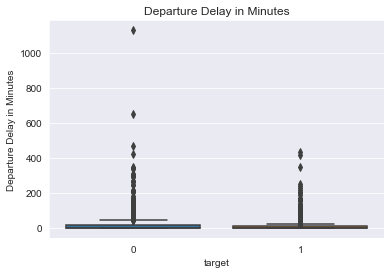

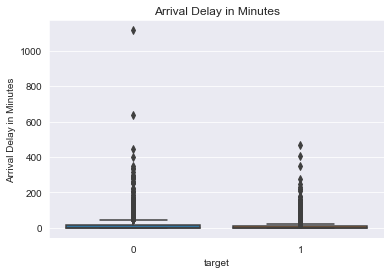

In [16]:
for i in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']:
  sns.boxplot(train['target'], train[i])
  plt.title(i)
  plt.show()

또한, delay 시간에 대한 큰 이상치들은 모두 불만족으로 분류되어있어 연관성이 있을 것이라 판단하여 제거하지 않는다.

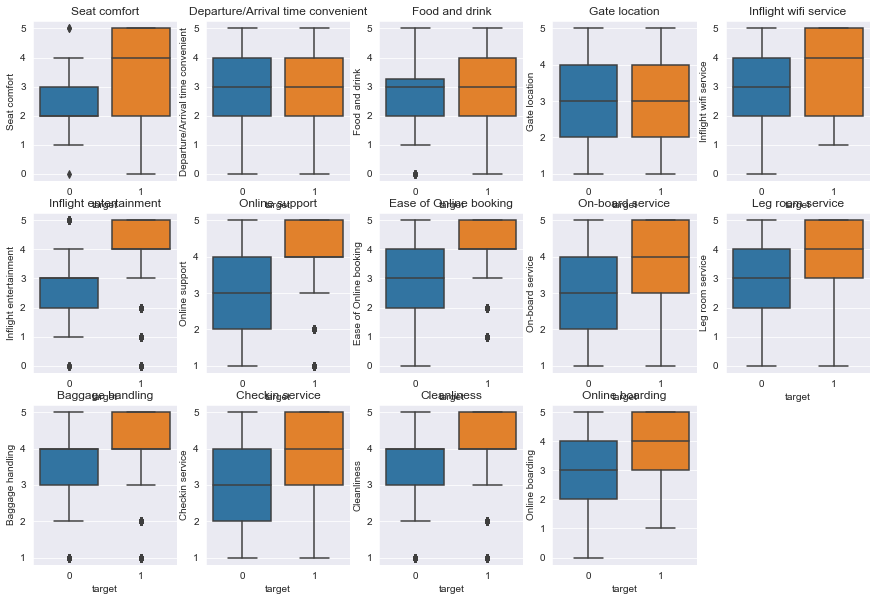

In [17]:
plt.figure(figsize=(15, 10))
for idx, i in enumerate(rank_col):
  plt.subplot(3, 5, idx+1)
  sns.boxplot(train['target'], train[i])
  plt.title(i)

In [18]:
len(object_col)

4

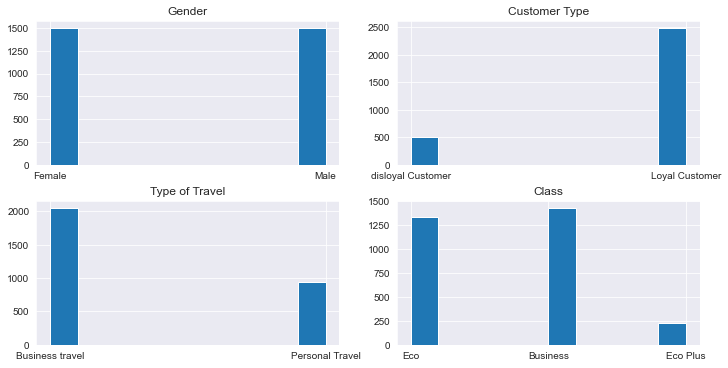

In [19]:
plt.figure( figsize=(10,5),
            constrained_layout = True )

for i in range(len(object_col)):
    plt.subplot( 2, 2, i+1 )
    plt.hist( train[object_col[i]] )
    plt.title(object_col[i])

위 변수들은 labelencoding 작업을 통해 numerical 변수로 변환!

# 2. Feature Engineering

In [20]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.target.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['target'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (5000, 23)


<AxesSubplot:>

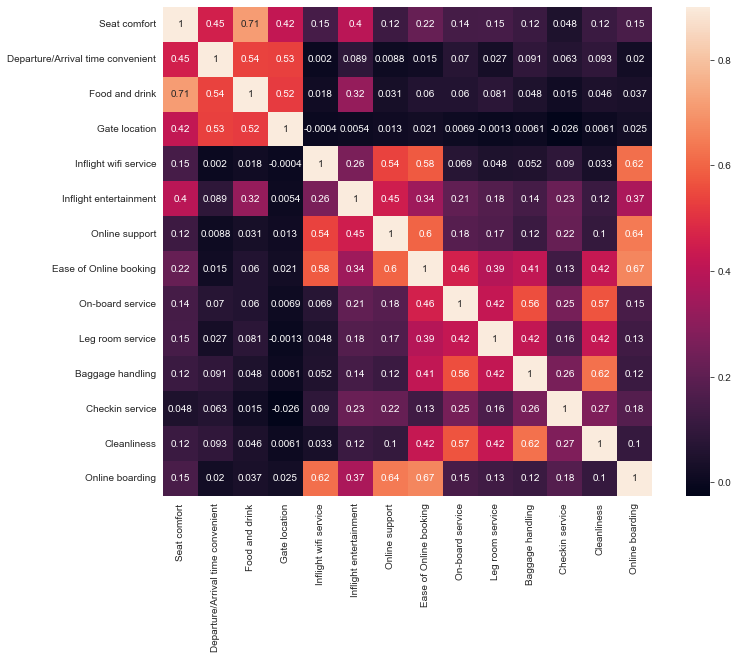

In [21]:
corrmat = all_data[rank_col].corr(method = 'spearman')
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot = True)

전체 데이터에 대해서 correlation을 확인한 결과, 만족도 변수간의 큰 상관관계를 가지지는 않는것을 확인할 수 있다.

### 1. multi category -> binary category

target 변수가 0과 1로 되어있기 때문에 같은 만족도를 나타내는 변수들을 0과 1로 변환

In [22]:
for i in rank_col:
  for j in range(5000):
    all_data[i][j] = 0 if all_data[i][j] <= 3 else 1

In [23]:
all_data[rank_col]

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,0,0,0,0,1,0,1,1,1,1,1,1,1,1
1,0,1,1,1,0,1,0,1,1,1,0,0,1,0
2,0,0,0,0,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,1,1,0,1,0
4,0,0,0,0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4996,1,1,1,1,0,1,1,1,1,1,1,0,1,0
4997,0,1,1,1,0,0,0,0,0,0,0,1,0,0
4998,1,0,1,1,1,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

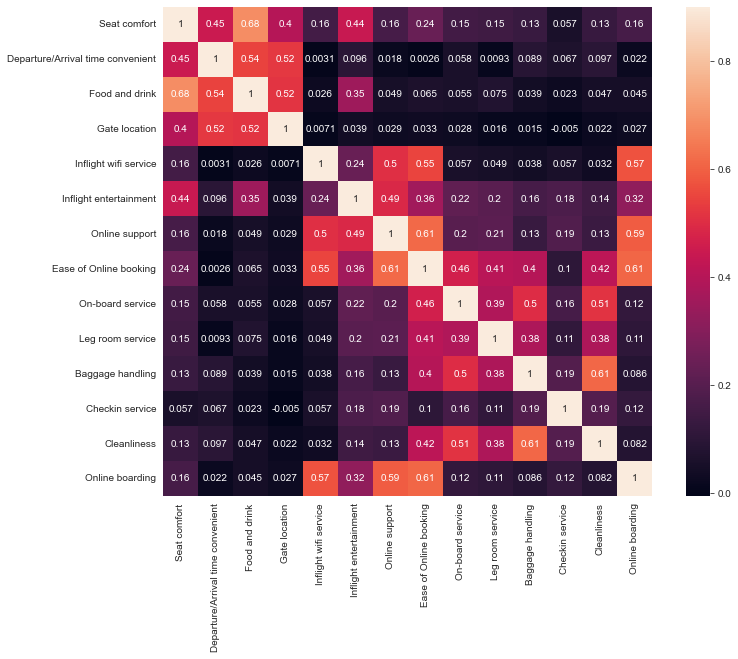

In [24]:
corrmat = all_data[rank_col].corr(method = 'spearman')
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot = True)

### 2. Log Transform

In [25]:
skewed_feats = all_data[col].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Departure Delay in Minutes,8.982
Arrival Delay in Minutes,8.586
Flight Distance,0.457


delay minute 변수의 왜도가 상당히 심하기 때문에 log 변환 진행

In [26]:
for i in col:
  all_data[i] = np.log1p(all_data[i])

In [27]:
skewed_feats = all_data[col].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Departure Delay in Minutes,0.942
Arrival Delay in Minutes,0.895
Flight Distance,-1.625


Flight Distance의 경우는 값의 범위가 다른 변수들과 잘 맞지 않기 때문에 이를 보정하기 위한  log변환 진행

## 3. LabelEncoding

In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 5000 non-null   int64  
 1   Gender                             5000 non-null   object 
 2   Customer Type                      5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Type of Travel                     5000 non-null   object 
 5   Class                              5000 non-null   object 
 6   Flight Distance                    5000 non-null   float64
 7   Seat comfort                       5000 non-null   int64  
 8   Departure/Arrival time convenient  5000 non-null   int64  
 9   Food and drink                     5000 non-null   int64  
 10  Gate location                      5000 non-null   int64  
 11  Inflight wifi service              5000 non-null   int64

In [30]:
object_col = [col for col in all_data if all_data[col].dtype == "object" ]

In [31]:
object_col

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
for i in object_col:
  lab = LabelEncoder()
  lab.fit(all_data[i])
  all_data[i] = lab.transform(all_data[i])

In [34]:
all_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,1,22,0,1,7.378,0,0,0,...,1,1,1,1,1,1,1,1,0.000,0.000
1,2,0,0,37,0,0,7.941,0,1,1,...,0,1,1,1,0,0,1,0,2.944,2.944
2,3,1,0,46,0,0,7.872,0,0,0,...,1,1,1,1,1,1,1,0,0.000,0.000
3,4,0,1,24,0,1,7.762,0,0,0,...,0,0,0,1,1,0,1,0,2.398,1.099
4,5,0,0,58,0,0,4.663,0,0,0,...,1,1,1,1,1,1,1,1,0.000,0.000


## 4. Numerical Feature to Category Feature

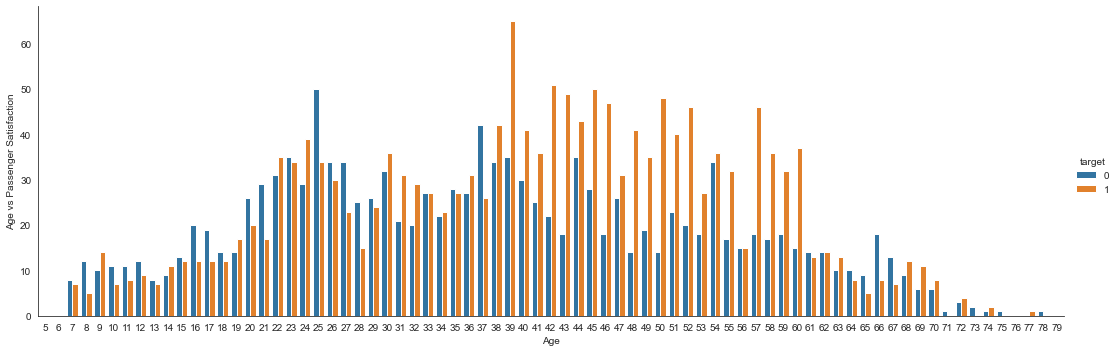

In [35]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=train, aspect=3.0, kind='count', hue='target', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

In [36]:
for l in range(len(all_data)): 
  all_data['Age'][l] = str(all_data['Age'][l] // 10)

In [37]:
all_data['Age'] = all_data['Age'].astype('str')

In [38]:
[col for col in all_data if all_data[col].dtype == "object" ]

['Age']

In [39]:
all_data= pd.get_dummies(all_data)

In [40]:
all_data

,id,Gender,Customer Type,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Arrival Delay in Minutes,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8
0,1,0,1,0,1,7.378,0,0,0,0,...,0.000,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,7.941,0,1,1,1,...,2.944,0,0,0,1,0,0,0,0,0
2,3,1,0,0,0,7.872,0,0,0,0,...,0.000,0,0,0,0,1,0,0,0,0
3,4,0,1,0,1,7.762,0,0,0,0,...,1.099,0,0,1,0,0,0,0,0,0
4,5,0,0,0,0,4.663,0,0,0,0,...,0.000,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1996,0,0,0,2,4.007,0,0,0,0,...,0.000,0,0,0,0,0,0,1,0,0
4996,1997,0,0,0,0,7.569,1,1,1,1,...,4.605,0,0,0,1,0,0,0,0,0
4997,1998,1,0,0,1,7.783,0,1,1,1,...,1.386,0,0,1,0,0,0,0,0,0
4998,1999,0,0,1,0,6.009,1,0,1,1,...,4.431,0,0,0,0,0,1,0,0,0


## 5. Train test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
all_data.drop('id', axis = 1, inplace = True)

In [43]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Modeling

In [44]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
import lightgbm as lgb
import catboost as cat

In [45]:
def accuracy(true, pred):   
    score = np.mean(true==pred)
    return score

In [46]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [47]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [48]:
RF = RandomForestClassifier()

In [49]:
GBoost = GradientBoostingClassifier()

In [50]:
model_xgb = xgb.XGBClassifier()

In [51]:
model_lgb = lgb.LGBMClassifier()

In [52]:
model_cat = cat.CatBoostClassifier()

In [53]:
n_folds = 10

In [54]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=10):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [55]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = RF)

In [56]:
stacked_averaged_models.fit(train.values, y_train)

StackingAveragedModels(base_models=(Pipeline(steps=[('robustscaler',
                                                     RobustScaler()),
                                                    ('elasticnet',
                                                     ElasticNet(alpha=0.0005,
                                                                l1_ratio=0.9,
                                                                random_state=3))]),
                                    GradientBoostingClassifier(),
                                    KernelRidge(alpha=0.6, coef0=2.5, degree=2,
                                                kernel='polynomial')),
                       meta_model=RandomForestClassifier())

In [57]:
st_train_pred = stacked_averaged_models.predict(train)
print(accuracy(y_train, st_train_pred))

0.896


In [58]:
model_xgb.fit(train, y_train)

XGBClassifier()

In [59]:
xgb_train_pred = model_xgb.predict(train)
print(accuracy(y_train, xgb_train_pred))

0.902


In [60]:
model_lgb.fit(train, y_train)

LGBMClassifier()

In [61]:
lgb_train_pred = model_lgb.predict(train)
print(accuracy(y_train, lgb_train_pred))

0.979


In [62]:
model_cat.fit(train, y_train)

Learning rate set to 0.016469
0:	learn: 0.6799722	total: 137ms	remaining: 2m 17s
1:	learn: 0.6654182	total: 146ms	remaining: 1m 12s
2:	learn: 0.6531786	total: 157ms	remaining: 52.2s
3:	learn: 0.6408593	total: 165ms	remaining: 41.1s
4:	learn: 0.6296363	total: 172ms	remaining: 34.2s
5:	learn: 0.6175751	total: 177ms	remaining: 29.4s
6:	learn: 0.6056150	total: 187ms	remaining: 26.5s
7:	learn: 0.5951984	total: 196ms	remaining: 24.3s
8:	learn: 0.5846326	total: 204ms	remaining: 22.5s
9:	learn: 0.5756121	total: 210ms	remaining: 20.8s
10:	learn: 0.5669414	total: 217ms	remaining: 19.5s
11:	learn: 0.5588500	total: 224ms	remaining: 18.5s
12:	learn: 0.5513984	total: 233ms	remaining: 17.7s
13:	learn: 0.5414387	total: 241ms	remaining: 16.9s
14:	learn: 0.5334494	total: 247ms	remaining: 16.2s
15:	learn: 0.5257503	total: 252ms	remaining: 15.5s
16:	learn: 0.5179071	total: 259ms	remaining: 14.9s
17:	learn: 0.5088074	total: 268ms	remaining: 14.6s
18:	learn: 0.4998213	total: 278ms	remaining: 14.3s
19:	learn

In [63]:
cat_train_pred = model_cat.predict(train)
print(accuracy(y_train, cat_train_pred))

0.9666666666666667


In [64]:
st_test_pred = stacked_averaged_models.predict(test)
xgb_test_pred = model_xgb.predict(test)
lgb_test_pred = model_lgb.predict(test)
cat_test_pred = model_cat.predict(test)

In [65]:
ensemble = st_test_pred*0.2 + xgb_test_pred*0.2 + lgb_test_pred*0.3 + cat_test_pred * 0.3

In [66]:
for i in range(len(ensemble)):
  ensemble[i] = 0 if ensemble[i] < 0.5 else 1

In [67]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = ensemble
sub.to_csv('stack_submission.csv', index=False)

In [68]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = cat_test_pred
sub.to_csv('cat_submission.csv', index=False)

In [69]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = lgb_test_pred
sub.to_csv('lgb_submission.csv', index=False)

In [70]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = xgb_test_pred
sub.to_csv('xgb_submission.csv', index=False)

In [71]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = st_test_pred
sub.to_csv('st_submission.csv', index=False)